In [ ]:
 !pip install langdetect

     |████████████████████████████████| 981 kB 4.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=dc88311d400114db2b825bd7f2d33fe73358531ed4c0eab67a1aa2c9d1484fb8
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
!pip install translate

In [ ]:
pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz#en_use_md-0.4.3

     |████████████████████████████████| 6.3 MB 3.5 MB/s 
     |████████████████████████████████| 621 kB 57.9 MB/s 
     |████████████████████████████████| 10.1 MB 45.8 MB/s 
     |████████████████████████████████| 456 kB 57.9 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Created wheel for en-use-md: filename=en_use_md-0.4.3-py3-none-any.whl size=24373 sha256=06e6a02775c0099099cf24cf3da79824ad130cb491d69f26e7f46811bb71e563
  Stored in directory: /root/.cache/pip/wheels/eb/ea/ff/b222ecfaffd69f3bd363bd2bf098ba556b3f478a32407f884a
  Created wheel for spacy-universal-sentence-encoder: filename=spacy_universal_sentence_encoder-0.4.3-py3-none-any.whl size=14764 sha256=1412ebbf2593e225dfd180e433bbbc228c80728c769071e8bc61228f894f6ca7
  Stored in directory: /root/.cache/pip/wheels/ad/b6/25/b72e0f73e0e5ea76ec803d27aa9fe4f17640bc6c109cb3bff4
Successfully built en-use-md spacy-universal-sentence-encoder
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1

In [ ]:
!pip install googletrans

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 8.2 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=97b18cd7937a57f20f55182c2a90fc7e1520297a80d5378144cf322717e31252
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
!pip install textblob

In [ ]:
!pip install goslate

  Created wheel for goslate: filename=goslate-1.5.1-py3-none-any.whl size=11411 sha256=8ae8a625b6674393d1fde6b69ae8d05e839720deabe55572a3799e4f58f4d072
  Stored in directory: /root/.cache/pip/wheels/16/5c/86/f561bb944dc9f853f9502427bde8fe557a6fafe146d4a432f2
Successfully built goslate


In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
from translate import Translator
import seaborn as sns  
sns.set(color_codes=True)
%matplotlib inline 
from matplotlib import pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import goslate
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import metrics

In [ ]:
import langdetect

In [ ]:
from langdetect import detect

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data-1.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df.shape

(8500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#df.dropna(inplace = True)
df = df.fillna('and')

In [ ]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df.shape

(8500, 4)

In [ ]:
# Selecting duplicate rows 
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant dataframe
duplicate

Duplicate Rows :


,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [ ]:
df.drop_duplicates()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
df.shape

(8500, 7)

In [ ]:
# Select all duplicate rows based on multiple column names in list
duplicateSubsetColsDF = df[df.duplicated(['Short description', 'Description'])]
duplicateSubsetColsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
81,erp SID_34 account locked,erp SID_34 account locked,ilvortuq zfgrlewm,GRP_0
123,unable to display expense report,unable to display expense report,rbozivdq gmlhrtvp,GRP_0
157,ess password reset,ess password reset,mtgujlcb kczyvpqr,GRP_0
181,unable to connect to vpn,unable to connect to vpn,aljbtwsh lepkbgix,GRP_19
...,...,...,...,...
8424,windows account lockout,windows account lockout,hvjmxkcp pvzlgeyw,GRP_0
8450,unable to connect to wifi,unable to connect to wifi,incjpxsq gdxbvaqz,GRP_0
8451,password reset erp SID_34,password reset erp SID_34,rcukxbvw pvnuqlyb,GRP_0
8458,windows account locked,windows account locked,nfckwprm iykptjna,GRP_0


In [ ]:
df['Short description'].str.len().max()

159

In [ ]:
shortdes = max(df['Short description'], key=len)
shortdes

'erp production order printing issue : connection to system production_order_interface_app with destination production_order_interface_vendor-connc is not okay.'

In [ ]:
df['Description'].str.len().max()

13001

In [ ]:
longdes = max(df['Description'], key = len)
longdes

'we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). \r\n\r\nbased on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip\r\n\r\nwe are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling options), or if you have any further questions or concerns, please let us know either by corresponding to us via this 

Mean 47.22 words (27.060032)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


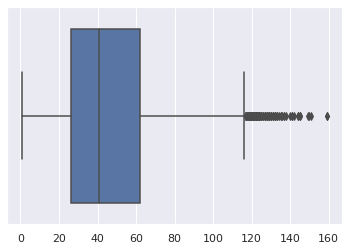

In [ ]:
result = [len(x) for x in df['Short description']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

Mean 204.03 words (519.642652)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


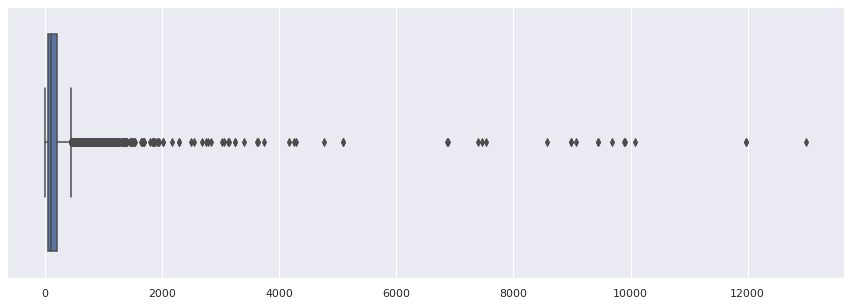

In [ ]:
plt.figure(figsize=[15,5])
result = [len(x) for x in df['Description']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

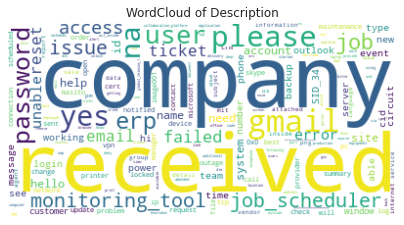

In [ ]:
#Creating the text variable
text = " ".join(df['Description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

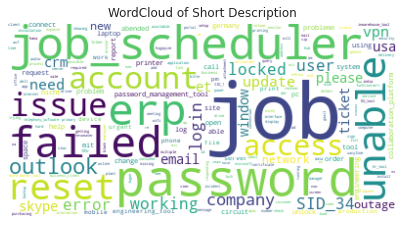

In [ ]:
#Creating the text variable
text = " ".join(df['Short description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Short Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

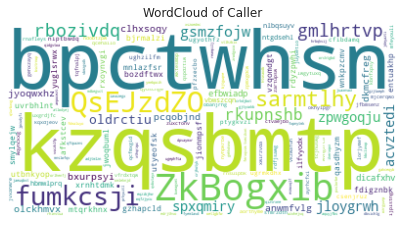

In [ ]:
#Creating the text variable
text = " ".join(df['Caller'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Caller")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

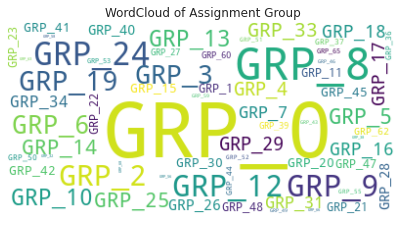

In [ ]:
#Creating the text variable
text = " ".join(df['Assignment group'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Assignment Group")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_70       1
GRP_64       1
GRP_73       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
dffilter = df.groupby("Assignment group").filter(lambda x: len(x) > 100)
dffilter.shape

(7030, 4)

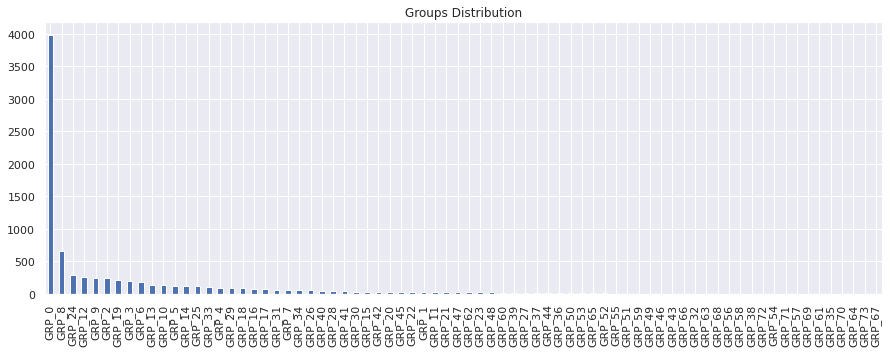

In [ ]:
df['Assignment group'].value_counts().plot(kind='bar', figsize=(15,5), title='Groups Distribution')

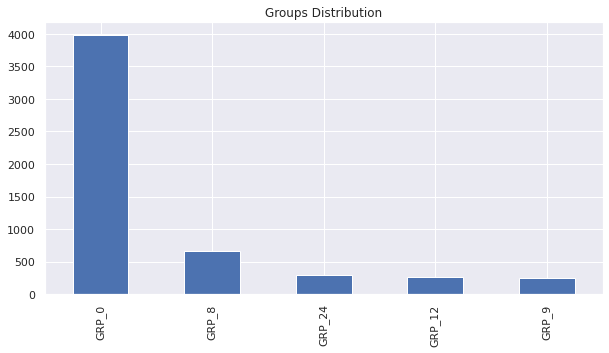

In [ ]:
df['Assignment group'].value_counts()[0:5].plot(kind='bar',figsize=(10,5), title='Groups Distribution')

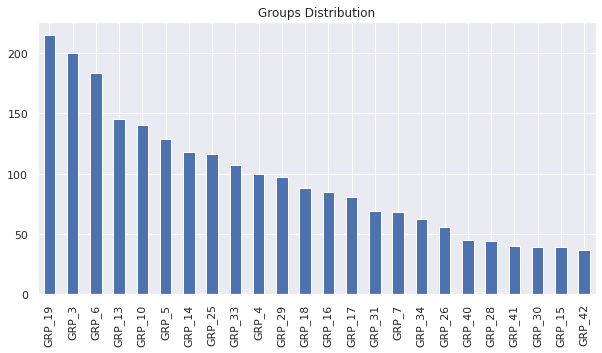

In [ ]:
df['Assignment group'].value_counts()[6:30].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

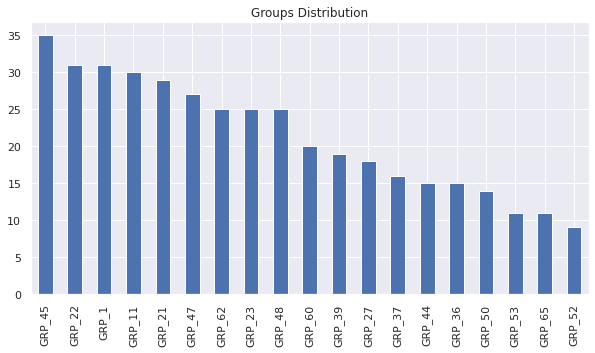

In [ ]:
df['Assignment group'].value_counts()[31:50].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

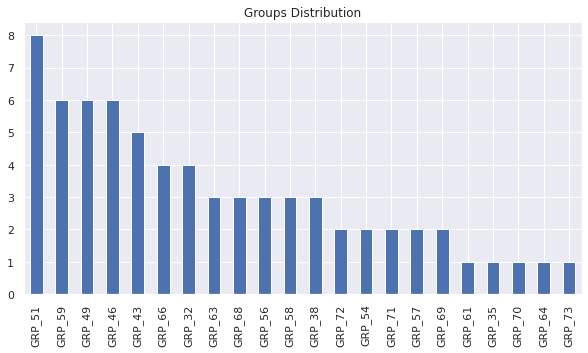

In [ ]:
df['Assignment group'].value_counts()[51:73].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

In [ ]:
agunique = df['Assignment group'].unique()
agunique.shape

(74,)

In [ ]:
unique = df['Caller'].unique()
unique.shape

(2950,)

In [ ]:
df['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
soujqrxw mvwduljx      1
jtboznci fiormedp      1
zreijwsb jnrxugpd      1
sitmzuje ckrpsabm      1
urkwvedc qcibogpt      1
Name: Caller, Length: 2950, dtype: int64

[]

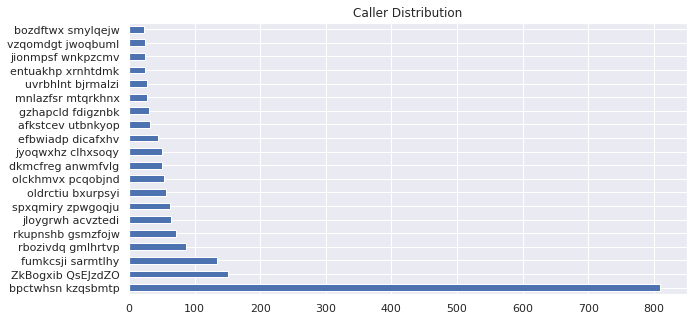

In [ ]:
# Top 20 callers
df['Caller'].value_counts()[0:20].plot(kind='barh', figsize=(10,5), title='Caller Distribution')
plt.plot()

In [ ]:
subsetdf = df.loc[(df["Caller"] == "bpctwhsn kzqsbmtp")]


In [ ]:
subsetdf

,Short description,Description,Caller,Assignment group
47,job Job_1424 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6
50,job mm_zscr0099_dly_merktc3 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
59,job mm_zscr0099_dly_merktc2 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
60,job Job_3181 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
67,job Job_1338 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_9
...,...,...,...,...
7053,job Job_1387 failed in job_scheduler at: 08/18...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_9
7059,job Job_2063b failed in job_scheduler at: 08/1...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6
7074,job HostName_1019fail failed in job_scheduler ...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
7076,job HostName_1019fail failed in job_scheduler ...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8


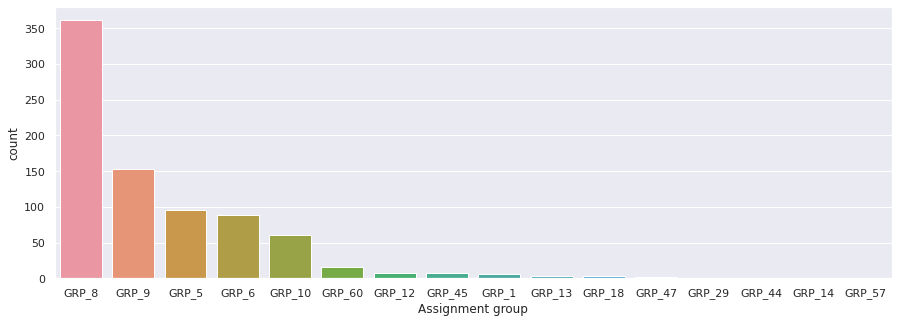

In [ ]:
plt.figure(figsize=[15,5])
#sns.countplot(subsetdf['Assignment group'],order=ascending)
sns.countplot(x = 'Assignment group',
              data = subsetdf,
              order = subsetdf['Assignment group'].value_counts().index)
plt.show()

In [ ]:
subsetcallerdf = df.loc[(df["Caller"] == "ZkBogxib QsEJzdZO")]

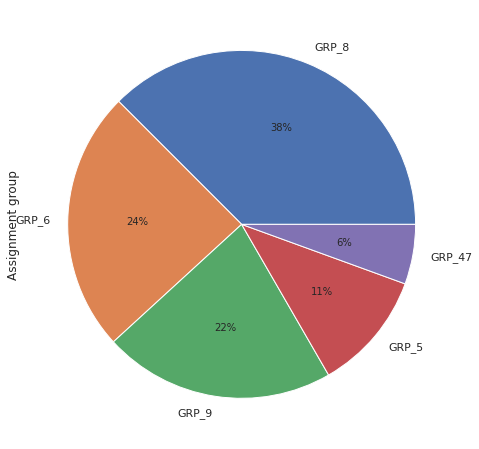

In [ ]:
fig,axs = plt.subplots(1,1, sharex=False, figsize=(8,8))
subsetcallerdf['Assignment group'].value_counts()[0:5].plot(kind='pie',autopct='%1.0f%%')

In [ ]:
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
#df['CombinedDescription'] = df['Short description'].str.cat(df['Description'], sep=' ', na_rep=' ')

In [ ]:
def convertToLower(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [ ]:
def sanitizeDataset(dataset, columnsToSanitize, regexList):
    for column in columnsToSanitize:
        for regex in regexList:
            dataset[column] = convertToLower(dataset[column], regex)
    return dataset

In [ ]:
def getRegularexpressionList():
   
    regularexList = []
    regularexList += ['From:(.*)\r\n']  # from
    regularexList += ['Sent:(.*)\r\n']  # sent
    regularexList += ['received from:(.*)\r\n']  # received from
    regularexList += ['received']  # received
    regularexList += ['To:(.*)\r\n']  # to
    regularexList += ['CC:(.*)\r\n']  # cc
    regularexList += ['(.*)infection']  # footer
    regularexList += ['\[cid:(.*)]']  # cid images
    regularexList += ['https?:[^\]\n\r]+']  # https & http
    regularexList += ['Subject:'] # subject
    regularexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails
    regularexList += ['[0-9][\-0–90-9 ]+']  # phone numbers
    regularexList += ['[0-9]']  # numbers
    regularexList += ['[^a-zA-z 0-9]+']  # non alphanumberic
    regularexList += ['[\r\n]']  # \r\n # tab & new line
    regularexList += [' [a-zA-Z] ']  # single letters
    regularexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words
    regularexList += ["  "]  # double spaces
    
    regularexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$'] #email address
    regularexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regularexList += ['Subject:']
    #regularexList += ['[^a-zA-Z]']

    return regularexList

In [ ]:
# Clean Short Description & Description separately
mods_df = sanitizeDataset(df, ['Short description'], getRegularexpressionList())
modd_df = sanitizeDataset(mods_df, ['Description'], getRegularexpressionList())

In [ ]:
Counter(" ".join(modd_df["Short description"]).split()).most_common(10)

[('job', 2510),
 ('password', 1043),
 ('not', 981),
 ('scheduler', 959),
 ('erp', 885),
 ('failed', 828),
 ('for', 746),
 ('tool', 734),
 ('the', 714),
 ('unable', 713)]

In [ ]:
Counter(" ".join(modd_df["Description"]).split()).most_common(10)

[('the', 6295),
 ('job', 2550),
 ('and', 2383),
 ('yes', 2027),
 ('not', 1961),
 ('please', 1951),
 ('for', 1888),
 ('na', 1574),
 ('from', 1459),
 ('this', 1453)]

In [ ]:
modd_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# Load the wrapper
nlp = spacy.load('en_use_md')

#df.drop("spacy_score", axis=1)
modd_df.insert(3, 'spacy_score', '0')

# Calcuate the Spacy Score for each row between Short Description and Description
for i in modd_df.index:
  modd_df.spacy_score[i] = round(nlp(modd_df.values[i][0]).similarity(nlp(modd_df.values[i][1])),1)
  

Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB



In [ ]:
modd_df

,Short description,Description,Caller,spacy_score,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,GRP_29
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,GRP_0
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,GRP_62


In [ ]:
# selecting rows based on condition 
rslt_df = modd_df[modd_df['spacy_score'] == 1.0]
rslt_df

,Short description,Description,Caller,spacy_score,Assignment group
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
5,unable log to engineering tool and skype,unable log to engineering tool and skype,eflahbxn ltdgrvkz,1,GRP_0
7,ticket employment status new non employee ent...,ticket employment status new non employee ent...,eqzibjhw ymebpoih,1,GRP_0
8,unable disable add ins outlook,unable disable add ins outlook,mdbegvct dbvichlg,1,GRP_0
...,...,...,...,...,...
8489,account locked,account locked,sdvlxbfe ptnahjkw,1,GRP_0
8492,hr tool etime option not visitble,hr tool etime option not visitble,tmopbken ibzougsd,1,GRP_0
8494,tablet needs reimaged due multiple issues with...,tablet needs reimaged due multiple issues with...,cpmaidhj elbaqmtp,1,GRP_3
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0


In [ ]:
modd_df.insert(4, 'CombinedDescription', '0')

In [ ]:
# Combine Description and Short Description text based on the Spacy Score
for i in modd_df.index:
    if modd_df.spacy_score[i] == 1.0:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i])
    else:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i]) + str(modd_df.Description[i])

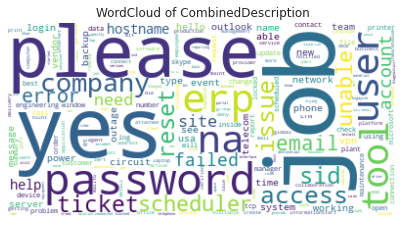

In [ ]:
#Creating the text variable
text = " ".join(modd_df['CombinedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of CombinedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
modd_df['SanitizedDescription'] = modd_df['CombinedDescription']
mod_df = sanitizeDataset(modd_df, ['SanitizedDescription'], getRegularexpressionList())

In [ ]:
mod_df

,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,unable access tool page,GRP_0,unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,1,skype error,GRP_0,skype error
...,...,...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,emails not coming from mail good afternoon n...,GRP_29,emails not coming from mail good afternoon no...
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,telephony software issue,GRP_0,telephony software issue
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset for tifpdchb pedxruyf
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,machine o est funcionandoi unable access the m...,GRP_62,machine est funcionandoi unable access the mac...


In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/moddf5.csv')

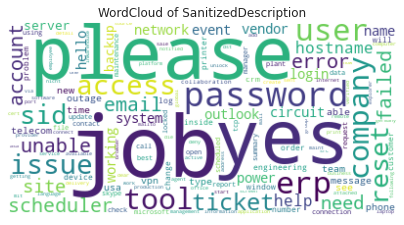

In [ ]:
#Creating the text variable
text = " ".join(mod_df['SanitizedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of SanitizedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
  mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/moddf5.csv')
  mod_df.head()

,Unnamed: 0,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error


In [ ]:
sanitized = mod_df['SanitizedDescription']

In [ ]:
 languages_langdetect = []
 languagetranslated = []
 for line in sanitized:
     try:
         result = langdetect.detect_langs(line)
         result = str(result[0])[:2]
         
     except:
         result = 'unknown'
    
     finally:
         languages_langdetect.append(result)
         #languagetranslated.append(line)

In [ ]:
mod_df['languages_langdetect'] = languages_langdetect
#langdetectdf = mod_df['languages_langdetect']

In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/languagedetected.csv')

In [ ]:
mod_df.insert(5, 'TranslatedDescription', '0')

In [ ]:
# blob = TextBlob('Hallo')
# output = blob.translate(to='en')
# output

In [ ]:
# translator= Translator(to_lang="English")
# translation = translator.translate("Hallo")
# translation

In [ ]:
# gs = goslate.Goslate()
# output = gs.translate("Hallo", 'en')
# output

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/languagedetected.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect
0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en
1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en
2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no
3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it
4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no


In [ ]:
import itertools
language_translate = []

#for line in langdetectdf:
for index, row in mod_df.iterrows():
    try:
        if (row['languages_langdetect'] == 'de') :
           blob = TextBlob(row['SanitizedDescription'])
           output = blob.translate(to='en')
           #gs = goslate.Goslate()
           #output = gs.translate(row['SanitizedDescription'], 'en')
           #translator = Translator()
           #output = translator.translate(row['SanitizedDescription'] , dest ='en').text
          #  translator= Translator(to_lang="English")
          #  output = translator.translate(row['SanitizedDescription'])
           language_translate.append(output)
        else :
           language_translate.append(row['SanitizedDescription'])
    except:
        output = 'unknown'
        print(output)
        language_translate.append(output)
    
    # finally:
    #     language_translate.append(row['SanitizedDescription'])

unknown
unknown
unknown
unknown
unknown
unknown


In [ ]:
#df["First season"] = df["First season"].apply(lambda x : 1 if x > 1990 else x)
#df.loc[mod_df.languages_langdetect == "de", "SanitizedDescription"] = method()

In [ ]:
mod_df['TranslatedDescription'] = language_translate

In [ ]:
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verified user details employee man...
1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meetings skype meetings et...
2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn cannot log vpn best
3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error


In [ ]:
mod_df['languages_langdetect'].unique()

array(['en', 'no', 'it', 'af', 'fr', 'sv', 'es', 'ca', 'sl', 'nl', 'id',
       'de', 'cy', 'et', 'da', 'sq', 'ro', 'pl', 'so', 'tl', 'unknown',
       'hr', 'pt', 'lt', 'vi', 'cs', 'lv', 'fi', 'sk', 'hu'], dtype=object)

In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/translateddf.csv')

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/translateddf.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verified user details employee man...
1,1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meetings skype meetings et...
2,2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn cannot log vpn best
3,3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
caller_list = mod_df["Caller"].unique().tolist()

In [ ]:
new_items = []
for item in caller_list:
    new_items.extend(item.split())

In [ ]:
cleandocs = list()
for desc in mod_df['TranslatedDescription']:
   
    wt = word_tokenize(desc) 
    
    filterdoc = [] 

    # Removing Stopwords
    for w in wt: 
        if w not in stop_words: 
            filterdoc.append(w) 
    
    # Lemmetization
    lemma_word = []
    wnl = WordNetLemmatizer()
    for w in filterdoc:
        word1 = wnl.lemmatize(w, pos = "n")
        word2 = wnl.lemmatize(word1, pos = "v")
        word3 = wnl.lemmatize(word2, pos = ("a"))
        #lemma_word.append(word3)
        lemma_word.append(w)
    words = ' '.join(lemma_word)
    cleandocs.append(words)

In [ ]:
mod_df['TranslatedDescription'] = cleandocs

In [ ]:
mod_df = sanitizeDataset(mod_df, ['TranslatedDescription'], getRegularexpressionList())

In [ ]:
removecaller = list()
count = int(0)
for call in mod_df['TranslatedDescription']:
    weight = word_tokenize(call) 
    
    filtercalldoc = [] 

    # Removing Callers
    for wd in weight: 
        if wd not in new_items: 
            filtercalldoc.append(wd) 
        else : 
            #print (call)
            count = count+1
print(count)

2479


In [ ]:
mod_df['TranslatedDescription']

0       login issue verified user details employee man...
1       outlook hello team meetings skype meetings etc...
2                               cant log vpn log vpn best
3                                 unable access tool page
4                                             skype error
                              ...                        
8495    emails coming mail good afternoon receiving em...
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    machine est funcionandoi unable access machine...
8499    different program types opened several differe...
Name: TranslatedDescription, Length: 8500, dtype: object

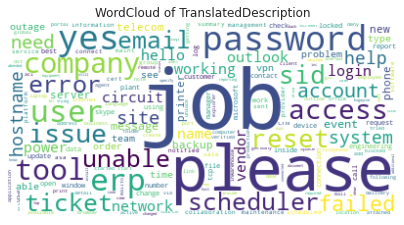

In [ ]:
#Creating the text variable
text = " ".join(mod_df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of TranslatedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(10)

[('job', 2664),
 ('please', 2173),
 ('yes', 2027),
 ('password', 1883),
 ('erp', 1671),
 ('company', 1472),
 ('tool', 1432),
 ('user', 1363),
 ('access', 1341),
 ('reset', 1162)]

In [ ]:
totalbefore = mod_df['TranslatedDescription'].str.split().str.len()
totalbefore.sum()

154148

In [ ]:
from collections import OrderedDict

mod_df['TranslatedDescription'] = (mod_df['TranslatedDescription'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [ ]:
totalafter = mod_df['TranslatedDescription'].str.split().str.len()

In [ ]:
totalafter.sum()

111010

In [ ]:
(totalbefore.sum() - totalafter.sum())

43138

Mean 94.85 words (149.377744)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


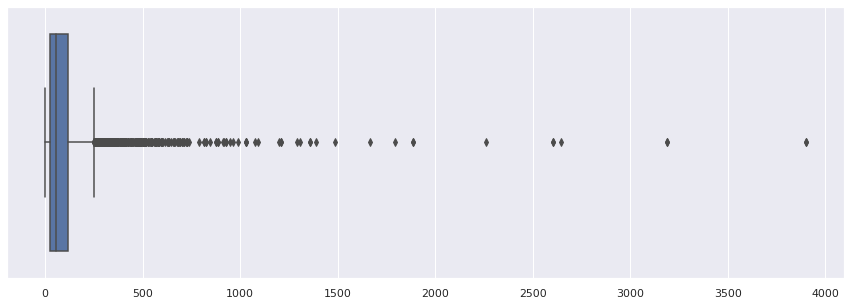

In [ ]:
plt.figure(figsize=[15,5])
result = [len(x) for x in mod_df['TranslatedDescription']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

In [ ]:
mod_df.shape

(8500, 12)

In [ ]:
mod_df = mod_df[mod_df['languages_langdetect'] != 'unknown']
mod_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verified user details employee man...
1,1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meetings skype etc appearin...
2,2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn best
3,3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,8495,8495,8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,emails not coming from mail good afternoon n...,GRP_29,emails not coming from mail good afternoon no...,en,emails coming mail good afternoon receiving se...
8496,8496,8496,8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1.0,telephony software issue,GRP_0,telephony software issue,en,telephony software issue
8497,8497,8497,8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1.0,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset for tifpdchb pedxruyf,en,vip windows password reset tifpdchb pedxruyf
8498,8498,8498,8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,machine o est funcionandoi unable access the m...,GRP_62,machine est funcionandoi unable access the mac...,en,machine est funcionandoi unable access utiliti...


In [ ]:
mod_df = mod_df[mod_df['SanitizedDescription']!='s']

In [ ]:
mod_df.shape

(8462, 12)

In [ ]:
subsetmod_df = mod_df[['TranslatedDescription', 'Assignment group']]

In [ ]:
subsetmod_df

,TranslatedDescription,Assignment group
0,login issue verified user details employee man...,GRP_0
1,outlook hello team meetings skype etc appearin...,GRP_0
2,cant log vpn best,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,emails coming mail good afternoon receiving se...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset tifpdchb pedxruyf,GRP_0
8498,machine est funcionandoi unable access utiliti...,GRP_62


In [ ]:
duplicate = subsetmod_df[subsetmod_df.duplicated(['TranslatedDescription', 'Assignment group'])]
duplicate

,TranslatedDescription,Assignment group
15,ticket update inplant,GRP_0
40,ticket update inplant,GRP_0
51,call ecwtrjnq jpecxuty,GRP_0
59,job zscr dly merktc failed scheduler,GRP_8
68,job failed scheduler,GRP_8
...,...,...
8460,abended job scheduler,GRP_9
8462,abended job scheduler,GRP_9
8466,abended job scheduler bkwin hostname inc,GRP_8
8486,ticket update,GRP_0


In [ ]:
mod_df = subsetmod_df.drop_duplicates()

In [ ]:
mod_df

,TranslatedDescription,Assignment group
0,login issue verified user details employee man...,GRP_0
1,outlook hello team meetings skype etc appearin...,GRP_0
2,cant log vpn best,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,emails coming mail good afternoon receiving se...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset tifpdchb pedxruyf,GRP_0
8498,machine est funcionandoi unable access utiliti...,GRP_62


In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(100)

[('please', 1754),
 ('erp', 892),
 ('tool', 839),
 ('password', 802),
 ('issue', 750),
 ('company', 747),
 ('unable', 716),
 ('access', 713),
 ('user', 670),
 ('error', 659),
 ('email', 654),
 ('reset', 634),
 ('hello', 615),
 ('help', 583),
 ('working', 563),
 ('need', 544),
 ('system', 466),
 ('sid', 458),
 ('ticket', 438),
 ('outlook', 424),
 ('message', 417),
 ('account', 404),
 ('see', 399),
 ('new', 376),
 ('phone', 372),
 ('hostname', 366),
 ('login', 361),
 ('team', 361),
 ('name', 360),
 ('able', 352),
 ('network', 350),
 ('best', 346),
 ('contact', 328),
 ('number', 326),
 ('check', 314),
 ('customer', 313),
 ('since', 301),
 ('summary', 294),
 ('get', 292),
 ('log', 283),
 ('server', 280),
 ('open', 273),
 ('time', 271),
 ('usa', 267),
 ('microsoft', 263),
 ('attached', 255),
 ('engineering', 252),
 ('work', 246),
 ('vpn', 245),
 ('site', 245),
 ('using', 244),
 ('internet', 244),
 ('crm', 241),
 ('type', 241),
 ('manager', 236),
 ('request', 234),
 ('problem', 234),
 ('chan

In [ ]:
#thislist = ['see', 'help', 'also', 'dear','could','since','able','please','sir','yes','hello', 'good morning', 'good afternoon', 'good day','company','need','na','try','me','un','r']
#list = ['please','hello']
# for x in list:
#    print(x)
#mod_df = mod_df["TranslatedDescription"].str.replace('please',"")
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('please', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('see', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('help', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('also', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('dear', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('could', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('since', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('able', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('sir', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('yes', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('hello', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good morning', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good afternoon', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good day', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('company', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('need', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('na', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('try', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('me', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('un', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('r', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(100)

[('ep', 916),
 ('use', 890),
 ('tool', 852),
 ('passwod', 809),
 ('issue', 758),
 ('access', 720),
 ('eo', 673),
 ('email', 654),
 ('eset', 649),
 ('woking', 578),
 ('system', 469),
 ('sid', 458),
 ('ticket', 438),
 ('outlook', 431),
 ('host', 427),
 ('ssage', 419),
 ('accot', 406),
 ('new', 376),
 ('phone', 374),
 ('login', 365),
 ('team', 363),
 ('netwok', 350),
 ('best', 346),
 ('contact', 334),
 ('numbe', 326),
 ('check', 314),
 ('custo', 314),
 ('summay', 294),
 ('get', 292),
 ('seve', 286),
 ('log', 283),
 ('povide', 283),
 ('ti', 280),
 ('open', 274),
 ('usa', 267),
 ('micosoft', 263),
 ('attached', 255),
 ('engineeing', 252),
 ('vpn', 251),
 ('wok', 249),
 ('cm', 247),
 ('site', 246),
 ('using', 244),
 ('intenet', 244),
 ('type', 241),
 ('mage', 240),
 ('poblem', 238),
 ('change', 235),
 ('equest', 235),
 ('sent', 232),
 ('locked', 231),
 ('following', 228),
 ('stat', 226),
 ('language', 223),
 ('skype', 222),
 ('getting', 216),
 ('sales', 216),
 ('job', 215),
 ('pinte', 210),


In [ ]:
mod_df.head()

,TranslatedDescription,Assignment group
0,login issue veified use details employee mage ...,GRP_0
1,outlook team etings skype etc appeaing calend...,GRP_0
2,cant log vpn best,GRP_0
3,access tool page,GRP_0
4,skype eo,GRP_0


In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sanitizedlemmatranclean.csv')

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sanitizedlemmatranclean.csv')
mod_df.head()

,Unnamed: 0,TranslatedDescription,Assignment group
0,0,login issue veified use details employee mage ...,GRP_0
1,1,outlook team etings skype etc appeaing calend...,GRP_0
2,2,cant log vpn best,GRP_0
3,3,access tool page,GRP_0
4,4,skype eo,GRP_0


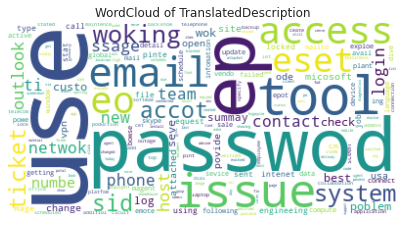

In [ ]:
#Creating the text variable
text = " ".join(mod_df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of TranslatedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
group0df = mod_df[mod_df['Assignment group']=='GRP_0']

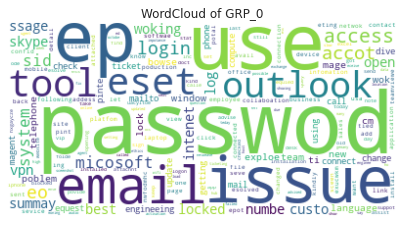

In [ ]:
#Creating the text variable
text = " ".join(group0df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of GRP_0")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
group8df = mod_df[mod_df['Assignment group']=='GRP_8']

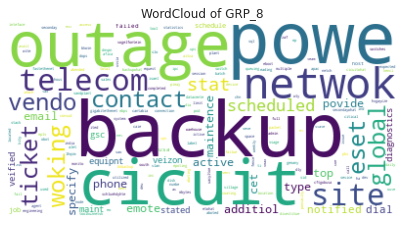

In [ ]:
#Creating the text variable
text = " ".join(group8df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of GRP_8")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
group24df = mod_df[mod_df['Assignment group']=='GRP_24']

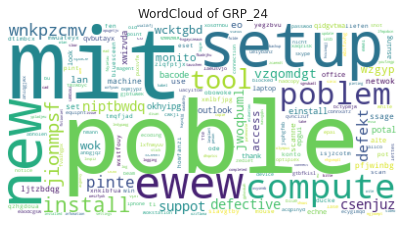

In [ ]:
#Creating the text variable
text = " ".join(group24df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of GRP_24")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
group12df = mod_df[mod_df['Assignment group']=='GRP_12']

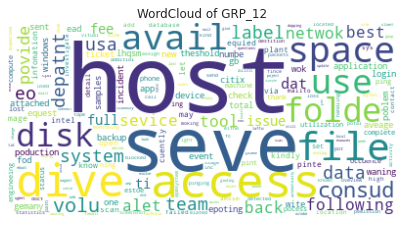

In [ ]:
#Creating the text variable
text = " ".join(group12df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of GRP_12")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
group9df = mod_df[mod_df['Assignment group']=='GRP_9']

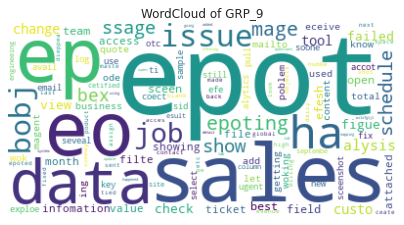

In [ ]:
#Creating the text variable
text = " ".join(group9df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of GRP_9")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#kdf = mod_df.loc[(mod_df["Caller"] == "ZkBogxib QsEJzdZO")]
kdf = mod_df[(mod_df['Assignment group']!= "GRP_0")]

In [ ]:
kdf

,Unnamed: 0,TranslatedDescription,Assignment group
6,6,event citical host com value motpoint theshol...,GRP_1
16,17,docking sceen co back,GRP_3
31,32,duplication netwok addess gentles two devices ...,GRP_4
41,43,eoute jobs pinte issue s esolved today woking...,GRP_5
45,47,job failed schedule,GRP_6
...,...,...,...
6720,8493,ep two accots addedi soy anothe added copy p...,GRP_10
6721,8494,tt s eimaged due multiple issues cm wifi etc,GRP_3
6722,8495,emails coming mail eceiving sent advise,GRP_29
6725,8498,machine est fciondoi access utilities finish ...,GRP_62


In [ ]:
#vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
vectorizer3 = TfidfVectorizer(stop_words = stop_words)
X3 = vectorizer3.fit_transform(kdf['TranslatedDescription'])
words = vectorizer3.get_feature_names()

In [ ]:
kmeans = KMeans(n_clusters = 20, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : open, eo, files, file, engineeing, excel, epot, ticket, ssage, outlook
1 : veizon, notified, diagnostics, veified, cet, dial, specify, maint, equipnt, gsc
2 : collaboation, platfom, exploe, bowse, intenet, telephone, micosoft, summay, language, email
3 : hp, descibe, ente, eceate, nsu, tansaction, esult, condition, authoized, attach
4 : schedule, job, failed, abended, sid, bkbackup, pod, ha, host, inc
5 : access, usa, inteface, switch, gigabitethenet, fastethenet, com, chn, coe, folde
6 : host, seve, exe, sevice, plm, access, pocess, folde, eboot, file
7 : total, disk, theshold, aveage, samples, fee, waning, size, gb, host
8 : consud, space, volu, avail, label, host, seve, dat, dev, sys
9 : eo, ssage, ep, attached, issue, use, system, sid, tool, getting
10 : sceen, pint, shot, pinte, login, ethics, ptqx, ep, attached, issue
11 : laptop, pinte, woking, softwae, install, outlook, monito, telephony, office, skype
12 : setup, new, laptop, jionmpsf, wnkpzcmv, beam, lxfnwyuv, bqmjypz, ah

In [ ]:
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X3)
    cs.append(kmeans.inertia_)

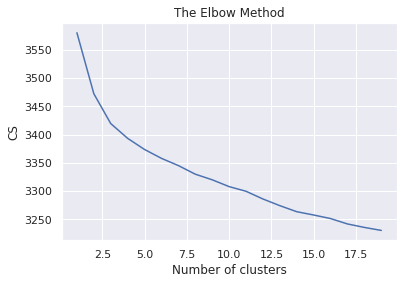

In [ ]:
plt.plot(range(1, 20), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X3)
    cs.append(kmeans.inertia_)

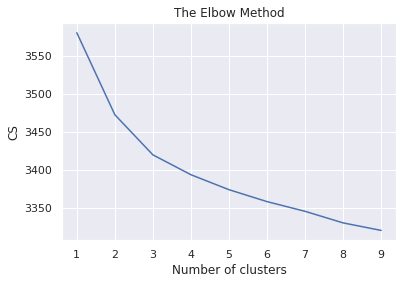

In [ ]:
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : tool, access, host, ep, eo, issue, use, new, passwod, seve
1 : veizon, notified, diagnostics, veified, cet, dial, specify, maint, equipnt, gsc
2 : schedule, job, failed, abended, sid, bkbackup, pod, host, bkwin, inc


In [ ]:
kdf["NewAssignmentGroup"] = kmeans.predict(X3)

In [ ]:
kdf["NewAssignmentGroup"].value_counts()

0    3317
2     167
1     138
Name: NewAssignmentGroup, dtype: int64

In [ ]:
kdf1 = mod_df[(mod_df['Assignment group'] == "GRP_0")]

In [ ]:
kdf1["NewAssignmentGroup"] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kdf1

,Unnamed: 0,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,cant log vpn best,GRP_0,3
3,3,access tool page,GRP_0,3
4,4,skype eo,GRP_0,3
...,...,...,...,...
6714,8485,ticket update inc use hbmwlpq ilfvyodx,GRP_0,3
6716,8488,ep accot lock mfeyouli ndobtzpw language bowse...,GRP_0,3
6719,8492,h tool eti option visitble,GRP_0,3
6723,8496,telephony softwae issue,GRP_0,3


In [ ]:
frames = [kdf1, kdf]

In [ ]:
kdfNew = pd.concat(frames)

In [ ]:
kdfNew

,Unnamed: 0,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,cant log vpn best,GRP_0,3
3,3,access tool page,GRP_0,3
4,4,skype eo,GRP_0,3
...,...,...,...,...
6720,8493,ep two accots addedi soy anothe added copy p...,GRP_10,0
6721,8494,tt s eimaged due multiple issues cm wifi etc,GRP_3,0
6722,8495,emails coming mail eceiving sent advise,GRP_29,0
6725,8498,machine est fciondoi access utilities finish ...,GRP_62,0


In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

In [ ]:
kdfNew.to_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv')

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,2,cant log vpn best,GRP_0,3
3,3,3,access tool page,GRP_0,3
4,4,4,skype eo,GRP_0,3


In [ ]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words)
X = vectorizer3.fit_transform(mod_df['TranslatedDescription'])
words = vectorizer3.get_feature_names()

In [ ]:
y = mod_df["NewAssignmentGroup"]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

Logistic Regression Score:  0.812778603268945
Logistic Regression F1 Score:  0.8127182508016249


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.7894997523526498
Naive Bayes F1 Score:  0.7892586381526472


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.8192174343734522
SVM F1 Score:  0.8191523103842575


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(train_x, train_y)
model_entropy.score(train_x, train_y)

0.9957519116397621

In [ ]:
model_entropy.score(test_x, test_y)

0.753838533927687

In [ ]:
# Pruned Decision Trees
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(train_x, train_y)
preds_pruned = clf_pruned.predict(test_x)
preds_pruned_train = clf_pruned.predict(train_x)

In [ ]:
acc_score = accuracy_score(test_y,preds_pruned)
print("Test results: ", acc_score)
print("Train results: ", accuracy_score(train_y,preds_pruned_train))

Test results:  0.6017830609212481
Train results:  0.6115123194562447


In [ ]:
f_sc = f1_score(test_y, preds_pruned, average='weighted', labels=np.unique(preds_pruned))
print("Decision Tree F1 Score: ", f_sc)

Decision Tree F1 Score:  0.534599727267813


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(train_x, train_y)
pred_RF = rfcl.predict(test_x)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.807825656265478


In [ ]:
f_sc = f1_score(test_y, pred_RF, average='weighted', labels=np.unique(pred_RF))
print("Random F1 Score: ", f_sc)

Random F1 Score:  0.8075707151539537


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(train_x, train_y)
pred_AB =abcl.predict(test_x)
acc_AB = accuracy_score(test_y, pred_AB)
print("AdaBoost accuracy: ", acc_AB)

AdaBoost accuracy:  0.5403665180782565


In [ ]:
f_sc = f1_score(test_y, pred_AB, average='weighted', labels=np.unique(pred_AB))
print("AdaBoosting Score: ", f_sc)

AdaBoosting Score:  0.3992238412376846


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=150, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(train_x, train_y)
pred_BG =bgcl.predict(test_x)
acc_BG = accuracy_score(test_y, pred_BG)
print(acc_BG)

0.7914809311540366


In [ ]:
f_sc = f1_score(test_y, pred_BG, average='weighted', labels=np.unique(pred_BG))
print("Bagging Score: ", f_sc)

Bagging Score:  0.7913155974863868


In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,2,cant log vpn best,GRP_0,3
3,3,3,access tool page,GRP_0,3
4,4,4,skype eo,GRP_0,3


Mean 96.68 words (145.832595)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


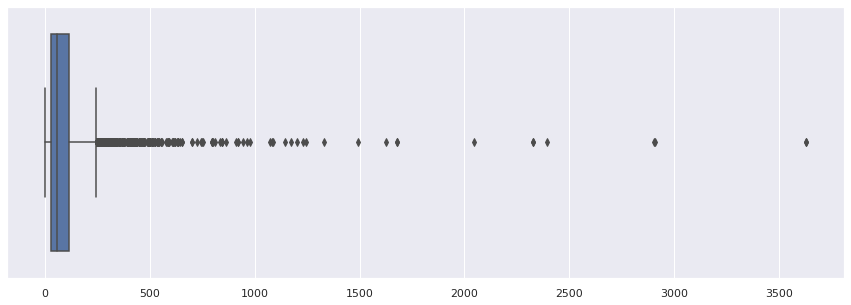

In [ ]:
plt.figure(figsize=[15,5])
result = [len(x) for x in mod_df['TranslatedDescription']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
X_test=[]
y_test=[]
embedding_matrix=[]

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Data/NLP1/glove.6B.50d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [ ]:
grpdf = mod_df.copy()
grpdf['TranslatedDescription']=mod_df['TranslatedDescription']
tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(grpdf['TranslatedDescription'])
grpdftext = tokenizer.texts_to_sequences(grpdf['TranslatedDescription'])

In [ ]:
y = grpdf["NewAssignmentGroup"]
X = tf.keras.preprocessing.sequence.pad_sequences(grpdftext, maxlen = maxlen)

In [ ]:
embeddings_index = dict()
embedding_matrix = np.zeros((numWords+1, 50))
for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
print("Number of train Samples:", len(X_train))
print("Number of val Samples:", len(X_Val))

Number of Samples: 6727
Number of Labels:  6727
Number of train Samples: 5381
Number of val Samples: 1346


In [ ]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   
model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()
plot_model(model,to_file="LSTM_Model.jpg")

checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history = model.fit(X_train,y_train,batch_size=100, epochs=10, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           450050    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               183296    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 659,450
Trainable params: 659,450
Non-trainable params: 0
_______________________________________________________

In [ ]:
pred = model.predict(X_test)
pred = [i.argmax() for i in pred]
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy of the model :",metrics.accuracy_score(y_test, pred))

Accuracy of the model : 0.7949479940564635


In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,2,cant log vpn best,GRP_0,3
3,3,3,access tool page,GRP_0,3
4,4,4,skype eo,GRP_0,3


In [ ]:
maxlen = 300
numWords=9000
epochs = 10

In [ ]:
X_test=[]
y_test=[]
embedding_matrix=[]

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Data/NLP1/glove.6B.50d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

In [ ]:
grpdf = mod_df.copy()
grpdf['TranslatedDescription']=mod_df['TranslatedDescription']
tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(grpdf['TranslatedDescription'])
grpdftext = tokenizer.texts_to_sequences(grpdf['TranslatedDescription'])

In [ ]:
y = grpdf["NewAssignmentGroup"]
X = tf.keras.preprocessing.sequence.pad_sequences(grpdftext, maxlen = maxlen)

In [ ]:
embeddings_index = dict()
embedding_matrix = np.zeros((numWords+1, 50))
for i,word in tokenizer.index_word.items():
      if i<numWords+1:
        embedding_vector = embeddings_glove.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
print("Number of Samples:", len(X))
print("Number of Labels: ", len(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
print("Number of train Samples:", len(X_train))
print("Number of val Samples:", len(X_Val))

Number of Samples: 6727
Number of Labels:  6727
Number of train Samples: 5381
Number of val Samples: 1346


In [ ]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(numWords+1,output_dim=50,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
gru=GRU(128)(embed)
drop=Dropout(0.3)(gru)
dense =Dense(100,activation='relu')(drop)
out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

# self.model.summary()
# plot_model(self.model,to_file="GRU.jpg")

checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
model_history = model.fit(X_train,y_train,batch_size=100, epochs=10, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

Epoch 1/10
54/54 [==============================] - 38s 653ms/step - loss: 0.8654 - accuracy: 0.5646 - val_loss: 0.6574 - val_accuracy: 0.6568

Epoch 00001: val_accuracy improved from -inf to 0.65676, saving model to model-001-0.656761.h5
Epoch 2/10
54/54 [==============================] - 35s 645ms/step - loss: 0.5943 - accuracy: 0.7121 - val_loss: 0.5459 - val_accuracy: 0.7400

Epoch 00002: val_accuracy improved from 0.65676 to 0.73997, saving model to model-002-0.739970.h5
Epoch 3/10
54/54 [==============================] - 35s 656ms/step - loss: 0.4835 - accuracy: 0.7803 - val_loss: 0.4976 - val_accuracy: 0.7764

Epoch 00003: val_accuracy improved from 0.73997 to 0.77637, saving model to model-003-0.776374.h5
Epoch 4/10
54/54 [==============================] - 36s 660ms/step - loss: 0.3852 - accuracy: 0.8309 - val_loss: 0.5317 - val_accuracy: 0.7660

Epoch 00004: val_accuracy did not improve from 0.77637
Epoch 5/10
54/54 [==============================] - 35s 648ms/step - loss: 0.3

In [ ]:
from sklearn import metrics
pred = model.predict(X_test)
pred = [i.argmax() for i in pred]
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy of the model :",metrics.accuracy_score(y_test, pred))

Accuracy of the model : 0.7934621099554234


In [ ]:
# grpdf = mod_df.copy()
# grpdf['TranslatedDescription']=mod_df['TranslatedDescription']
# tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
# tokenizer.fit_on_texts(grpdf['TranslatedDescription'])
# grpdftext = tokenizer.texts_to_sequences(grpdf['TranslatedDescription'])

In [ ]:
# y = grpdf["NewAssignmentGroup"]
# X = pad_sequences(grpdftext, maxlen = maxlen)

In [ ]:
# embeddings_index = dict()
# embedding_matrix = np.zeros((numWords+1, 100))
# for i,word in tokenizer.index_word.items():
#       if i<numWords+1:
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector

In [ ]:
# print("Number of Samples:", len(X))
# print("Number of Labels: ", len(y))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
# X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
# print("Number of train Samples:", len(X_train))
# print("Number of val Samples:", len(X_Val))

Number of Samples: 6727
Number of Labels:  6727
Number of train Samples: 5381
Number of val Samples: 1346


In [ ]:
# input_layer = Input(shape=(maxlen,),dtype=tf.int64)
# embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
# lstm=Bidirectional(LSTM(128))(embed)
# drop=Dropout(0.3)(lstm)
# dense =Dense(100,activation='relu')(drop)
# out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   
# model = Model(input_layer,out)
# model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

# model.summary()
# plot_model(model,to_file="LSTM_Model.jpg")

# checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
# reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
# model_history = model.fit(X_train,y_train,batch_size=100, epochs=10, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 300, 100)          900100    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               234496    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 404       
Total params: 1,160,700
Trainable params: 1,160,700
Non-trainable params: 0
_________________________________________________

In [ ]:
# from sklearn import metrics
# pred = model.predict(X_test)
# pred = [i.argmax() for i in pred]
# accuracy = metrics.accuracy_score(y_test, pred)
# print("Accuracy of the model :",metrics.accuracy_score(y_test, pred))

Accuracy of the model : 0.48588410104011887


In [ ]:
# mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/prediction.csv')
# mod_df.head()

,Unnamed: 0,Unnamed: 0.1,TranslatedDescription,Assignment group,NewAssignmentGroup
0,0,0,login issue veified use details employee mage ...,GRP_0,3
1,1,1,outlook team etings skype etc appeaing calend...,GRP_0,3
2,2,2,cant log vpn best,GRP_0,3
3,3,3,access tool page,GRP_0,3
4,4,4,skype eo,GRP_0,3


In [ ]:
# !pip install transformers
# from transformers import DistilBertTokenizerFast

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 56.8 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 
     |████████████████████████████████| 636 kB 70.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# from tqdm import tqdm
# from torch.utils.data import DataLoader
# from transformers import DistilBertForSequenceClassification, AdamW
# import torch

# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=4)
# model.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
# labels = mod_df["NewAssignmentGroup"].tolist()
# texts = mod_df["TranslatedDescription"].tolist()


In [ ]:
# mod_df["NewAssignmentGroup"].value_counts()

0    3317
3    3105
2     167
1     138
Name: NewAssignmentGroup, dtype: int64

In [ ]:
# tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
# train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=.3,stratify=labels)

In [ ]:
# test_texts, val_texts, test_labels, val_labels = train_test_split(val_texts, val_labels, test_size=.5,stratify=val_labels)

In [ ]:
# train_size=len(train_texts)
# val_size=len(val_texts)
# test_size=len(test_texts)

In [ ]:
# train_encodings = tokenizer(train_texts, truncation=True, padding=True)
# val_encodings = tokenizer(val_texts, truncation=True, padding=True)
# test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [ ]:
# class TicketDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):
#         return len(self.labels)

# train_dataset = TicketDataset(train_encodings, train_labels)
# val_dataset = TicketDataset(val_encodings, val_labels)
# test_dataset = TicketDataset(test_encodings, test_labels)

In [ ]:
# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# validation_dataloader= DataLoader(val_dataset, batch_size=4, shuffle=True)


# optim = AdamW(model.parameters(), lr=5e-5)

# for epoch in tqdm(range(5)):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     for batch in train_loader:
#         optim.zero_grad()
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs[0]
#         loss.backward()
#         optim.step()
        
#         running_loss += loss.item()
#         predictions = outputs.logits.argmax(-1)
#         correct += (predictions == labels).float().sum()
        
        
#     print("Loss:", running_loss / batch["input_ids"].shape[0])
#     accuracy = 100 * correct / train_size
#     print("Training accuracy:", accuracy.item())
    
    
    
#     model.eval()

#     correct = 0
#     for batch in validation_dataloader:
  
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         labels = batch['labels'].to(device)
#         outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#         loss = outputs[0]
        
#         running_loss += loss.item()
#         predictions = outputs.logits.argmax(-1)
#         correct += (predictions == labels).float().sum()
        
        
#     print("Loss:", running_loss / batch["input_ids"].shape[0])
#     accuracy = 100 * correct / val_size
#     print("validation accuracy:", accuracy.item())

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
# test_dataloader= DataLoader(test_dataset, batch_size=16, shuffle=True)
# correct = 0
# model.eval()

# for batch in test_dataloader:

#     input_ids = batch['input_ids'].to(device)
#     attention_mask = batch['attention_mask'].to(device)
#     labels = batch['labels'].to(device)
#     outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#     loss = outputs[0]

#     running_loss += loss.item()
#     predictions = outputs.logits.argmax(-1)
#     correct += (predictions == labels).float().sum()


# print("Loss:", running_loss / batch["input_ids"].shape[0])
# accuracy = 100 * correct / val_size
# print("test accuracy:", accuracy.item())